# Barnsley Fern

This is an implementation of the [barnsley fern](https://en.wikipedia.org/wiki/Barnsley_fern).

It generates 25 frames of the fern with varying values at F4 matrix's values, of the fern gradually less bent, up until a straight position.

With the 25 frames generated, it then generates an animated gif with all the images.

In [1]:
from numpy import *
from pylab import *
from random import randint

frameCount = 25                                             # Number of frames
imageSize = 300                                             # Pixel-width of plot
pointsToSkip = 20                                           # Initial points to skip
iterations = 50000                                          # Number of iterations/points
drawPoints = zeros((frameCount,iterations-pointsToSkip,2))  # List of pixels we hit
P = matrix('0; 0')                                          # Initial x,y point
fernImagesFolder = 'fernImages'
        
# Barnsley magical tunings happen here:
F1 = matrix('0 0; 0.16 0')
F1c = matrix('0; 0')
c1 = array([1,0,0])
F2 = matrix('0.2 -0.26; 0.23 0.22')
F2c = matrix('0; 1.6')
c2 = array([0,1,0])
F3 = matrix('-0.15 0.28; 0.26 0.24')
F3c = matrix('0; 0.44')
c3 = array([0,0,1])
F4 = matrix('0.85 0.06; -0.06 0.85')
F4c = matrix('0; 1.6')
c4 = array([1,0,1])
weights = [0.01,0.07,0.07,0.85]

bending = 0.05

for frame in range(frameCount):
    
    F4[0,1] = bending
    F4[1,0] = 0-bending
    
    for i in range(iterations):
        f = np.random.choice(arange(4),p=weights)

        if f == 0:
            P = F1 * P + F1c
        elif f == 1:
            P = F2 * P + F2c
        elif f == 2:
            P = F3 * P + F3c
        else:
            P = F4 * P + F4c

        if i > 20:
            drawPoints[frame][i-pointsToSkip] = squeeze(asarray(P))

    
    bending = bending - 0.002
    print('Frame %d generated' % frame)
        
print('Fern data generation compelete.')

Frame 0 generated
Frame 1 generated
Frame 2 generated
Frame 3 generated
Frame 4 generated
Frame 5 generated
Frame 6 generated
Frame 7 generated
Frame 8 generated
Frame 9 generated
Frame 10 generated
Frame 11 generated
Frame 12 generated
Frame 13 generated
Frame 14 generated
Frame 15 generated
Frame 16 generated
Frame 17 generated
Frame 18 generated
Frame 19 generated
Frame 20 generated
Frame 21 generated
Frame 22 generated
Frame 23 generated
Frame 24 generated
Fern data generation compelete.


Rendered frame 0000
Rendered frame 0001
Rendered frame 0002
Rendered frame 0003
Rendered frame 0004
Rendered frame 0005
Rendered frame 0006
Rendered frame 0007
Rendered frame 0008
Rendered frame 0009
Rendered frame 0010
Rendered frame 0011
Rendered frame 0012
Rendered frame 0013
Rendered frame 0014
Rendered frame 0015
Rendered frame 0016
Rendered frame 0017
Rendered frame 0018
Rendered frame 0019
Rendered frame 0020
Rendered frame 0021
Rendered frame 0022
Rendered frame 0023
Rendered frame 0024


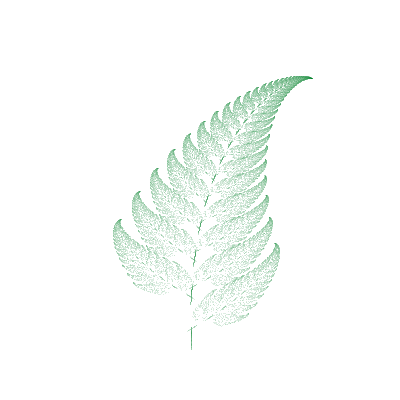

In [5]:
from IPython.display import Image as ImageShow

# Set xlim and ylim of view...
xrng = [drawPoints[frameCount-1][:,0].min(), drawPoints[0][:,0].max()]
yrng = [drawPoints[0][:,1].min(), drawPoints[-1][:,1].max()]
xrng[0] = xrng[0] - 1
xrng[1] = xrng[1] + 1

for frame in range(frameCount):

    V,b = histogramdd( drawPoints[frame], bins=imageSize, range=(xrng,yrng) )
    I = log(V+1)/log(V.max()+1)

    bigger = zeros(shape=(400,400))
    bigger[50:350,50:350] = I.T

    colorMap = {'red':   ((0.0, 1.0, 1.0),
                          (1.0, 0.0, 0.0)),
                'green': ((0.0, 1.0, 1.0),
                          (1.0, 0.5, 1.0)),
                'blue':  ((0.0, 1.0, 1.0),
                          (1.0, 0.16, 1.00))}

    register_cmap(name='FernColors', data=colorMap)

    imgName = fernImagesFolder + '/fern%04d.png' % frame
    imsave(arr=bigger, fname=imgName,cmap='FernColors', origin='lower')

    print('Rendered frame %04d' % frame)

ImageShow(filename= fernImagesFolder + '/fern0000.png')

In [6]:
import shutil
import os

for fernFrame in range(0,25):
    curFrame = "./" + fernImagesFolder + '/fern%04d.png' % (24-fernFrame)
    newFrame = "./" + fernImagesFolder +   '/fern%04d.png' % (25+fernFrame)
    shutil.copy(curFrame, newFrame)
    
print('Copying done.')

Copying done.


In [7]:
os.system('convert %s/*.png fernAnimation.gif' % fernImagesFolder)

print("Gif Generated")

Gif Generated


In [7]:
from IPython.display import Image
Image(url="fernAnimation.gif")